# Feature engineering

Create new features from existing features present in the data.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_data():
    dataframe = pd.read_csv('data/kickstarter.csv', parse_dates=['deadline', 'launched'])
    dataframe = dataframe[dataframe.launched != '1970-01-01 01:00:00']
    dataframe["week_day"] = dataframe.launched.apply(lambda x: x.day_name())
    dataframe = dataframe.assign(outcome=(dataframe['state'] == 'successful').astype(int))
    dataframe.drop(["name", "state"], axis=1, inplace=True)
    return dataframe

## Numerical features

### Binning

Binning consists of taking numerical data and transform them into categorical data.

* useful when there is uncertainty in the measurements (one of the few good reason to do that) => this removes the uncertainty in the measurements once we removed the initial feature
* another reason might be that we just really want to use a model that works on categorical data instead => questionable because we are throwing info away by binning

Quantile binning categorizes data by their place in the data distribution

* ensures that every one of our bins has an equal number of samples within them
* great solution when we need to transform continuous data to discrete values and we don't want to lose the distribution in the process

In [3]:
df = read_data()

In [4]:
df["two_quant_goal"] = pd.qcut(df['goal'], q=2)
df.groupby('two_quant_goal').two_quant_goal.count()

two_quant_goal
(0.009000000000000001, 5200.0]    189430
(5200.0, 100000000.0]             189224
Name: two_quant_goal, dtype: int64

In [5]:
df["ten_quant_goal"] = pd.qcut(df['goal'], q=10)
df.groupby('ten_quant_goal').ten_quant_goal.count()

ten_quant_goal
(0.009000000000000001, 675.0]    37876
(675.0, 1500.0]                  43306
(1500.0, 2500.0]                 34738
(2500.0, 4000.0]                 37828
(4000.0, 5200.0]                 35682
(5200.0, 9000.0]                 38193
(9000.0, 12500.0]                37703
(12500.0, 20800.0]               37599
(20800.0, 50000.0]               45888
(50000.0, 100000000.0]           29841
Name: ten_quant_goal, dtype: int64

In [6]:
df["twenty_quant_goal"] = pd.qcut(df['goal'], q=20)
df.groupby('twenty_quant_goal').twenty_quant_goal.count()

twenty_quant_goal
(0.009000000000000001, 400.0]    20303
(400.0, 675.0]                   17573
(675.0, 1000.0]                  26030
(1000.0, 1500.0]                 17276
(1500.0, 2000.0]                 19562
(2000.0, 2500.0]                 15176
(2500.0, 3000.0]                 18289
(3000.0, 4000.0]                 19539
(4000.0, 5000.0]                 35294
(5000.0, 5200.0]                   388
(5200.0, 7000.0]                 20742
(7000.0, 9000.0]                 17451
(9000.0, 10000.0]                28134
(10000.0, 12500.0]                9569
(12500.0, 16000.0]               19230
(16000.0, 20800.0]               18369
(20800.0, 30000.0]               23557
(30000.0, 50000.0]               22331
(50000.0, 90000.0]               11163
(90000.0, 100000000.0]           18678
Name: twenty_quant_goal, dtype: int64

In [7]:
df.head()

,ID,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,week_day,outcome,two_quant_goal,ten_quant_goal,twenty_quant_goal
0,1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,1533.95,Tuesday,0,"(0.009000000000000001, 5200.0]","(675.0, 1500.0]","(675.0, 1000.0]"
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,30000.00,Saturday,0,"(5200.0, 100000000.0]","(20800.0, 50000.0]","(20800.0, 30000.0]"
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,45000.00,Saturday,0,"(5200.0, 100000000.0]","(20800.0, 50000.0]","(30000.0, 50000.0]"
3,1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,5000.00,Saturday,0,"(0.009000000000000001, 5200.0]","(4000.0, 5200.0]","(4000.0, 5000.0]"
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,19500.00,Saturday,0,"(5200.0, 100000000.0]","(12500.0, 20800.0]","(16000.0, 20800.0]"


## Categorical features

### Interactions

Easy way to get new features by combining categorical variables.

In [8]:
df = pd.DataFrame({
    'category': ['Film', 'Music', 'Food', 'Music', 'Food'],
    'country': ['US', 'US', 'US', 'BE', 'BE']
})
df.head()

,category,country
0,Film,US
1,Music,US
2,Food,US
3,Music,BE
4,Food,BE


In [9]:
df["cat_country"] = df.category + "_" + df.country
df.head()

,category,country,cat_country
0,Film,US,Film_US
1,Music,US,Music_US
2,Food,US,Food_US
3,Music,BE,Music_BE
4,Food,BE,Food_BE


### Aggregation and count

For example, if we look at house price market, we may have a column with renovation_year that could contain lots of missing values or 0 which would mean that the houses were never renovated. We could transform that into a category renovated/not_renovated instead of dropping the columns if we have lots of missing values.

In [10]:
df = read_data()
df.head()

,ID,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,week_day,outcome
0,1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,1533.95,Tuesday,0
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,30000.00,Saturday,0
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,45000.00,Saturday,0
3,1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,5000.00,Saturday,0
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,19500.00,Saturday,0


In [11]:
df = df.assign(
    launched_year=df.launched.dt.year,
    launched_month=df.launched.dt.month
)
df.head()

,ID,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,week_day,outcome,launched_year,launched_month
0,1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,GB,0.0,0.0,1533.95,Tuesday,0,2015,8
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,15,US,100.0,2421.0,30000.00,Saturday,0,2017,9
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,3,US,220.0,220.0,45000.00,Saturday,0,2013,1
3,1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,1,US,1.0,1.0,5000.00,Saturday,0,2012,3
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,14,US,1283.0,1283.0,19500.00,Saturday,0,2015,7


In [12]:
launched = pd.DataFrame(df.groupby(["launched_year", "launched_month"]).size().reset_index(name='counts'))
launched["number_projects_per_month"] = launched.launched_year.apply(str) + "-" + launched.launched_month.apply(str)
launched

,launched_year,launched_month,counts,number_projects_per_month
0,2009,4,19,2009-4
1,2009,5,74,2009-5
2,2009,6,75,2009-6
3,2009,7,78,2009-7
4,2009,8,115,2009-8
...,...,...,...,...
101,2017,9,4100,2017-9
102,2017,10,4692,2017-10
103,2017,11,4666,2017-11
104,2017,12,2751,2017-12


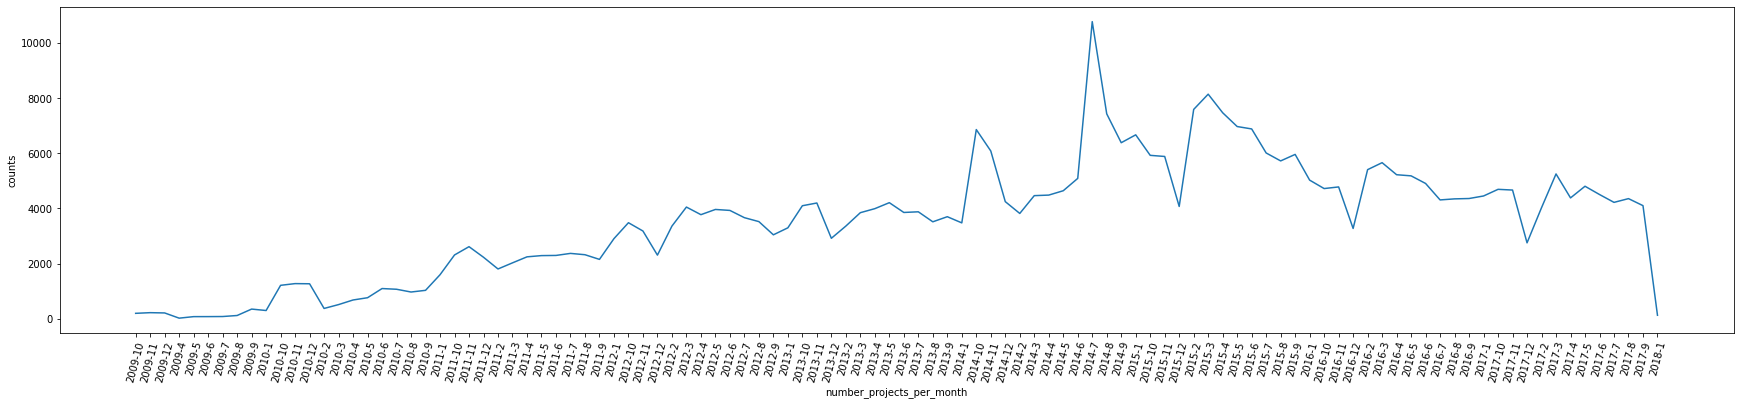

In [13]:
plt.figure(figsize=(30,6))
plt.xticks(rotation=75)
sns.lineplot(x=launched["number_projects_per_month"], y=launched["counts"])

In [14]:
launched = pd.Series(df.index, index=df.launched, name="count_1_month").sort_index()
launched.head(20)

launched
2009-04-21 21:02:48    169268
2009-04-23 00:07:53    322000
2009-04-24 21:52:03    138572
2009-04-25 17:36:21    325391
2009-04-27 14:10:39    122662
2009-04-28 13:55:41    213711
2009-04-29 02:04:21    345606
2009-04-29 02:58:50    235255
2009-04-29 04:37:37     98954
2009-04-29 05:26:32    342226
2009-04-29 06:43:44    275091
2009-04-29 13:52:03    284115
2009-04-29 22:08:13     32898
2009-04-29 23:11:15    153308
2009-04-30 01:32:55     19561
2009-04-30 07:14:06    225159
2009-04-30 22:10:30     28960
2009-04-30 22:22:43     59959
2009-04-30 22:23:22    157553
2009-05-01 05:06:19    359589
Name: count_1_month, dtype: int64

In [15]:
count_1_month = launched.rolling('30D').count() - 1
count_1_month.head()

launched
2009-04-21 21:02:48    0.0
2009-04-23 00:07:53    1.0
2009-04-24 21:52:03    2.0
2009-04-25 17:36:21    3.0
2009-04-27 14:10:39    4.0
Name: count_1_month, dtype: float64

Text(0.5, 1.0, 'Competitions in the last month')

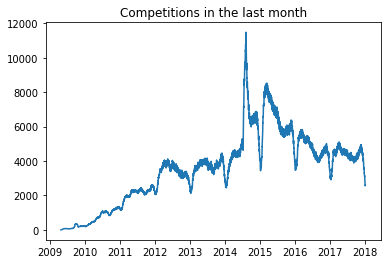

In [16]:
plt.plot(count_1_month)
plt.title("Competitions in the last month")